In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score
from sklearn.model_selection import KFold
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [32]:
df = pd.read_csv('Dry_Bean_Dataset.csv')
# print(df)
display(df)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [33]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [34]:
df.shape

(13611, 17)

In [35]:
df.isna().sum()
#check missing values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [36]:
print(set(df["Class"].values))

{'SIRA', 'SEKER', 'CALI', 'DERMASON', 'BOMBAY', 'HOROZ', 'BARBUNYA'}


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


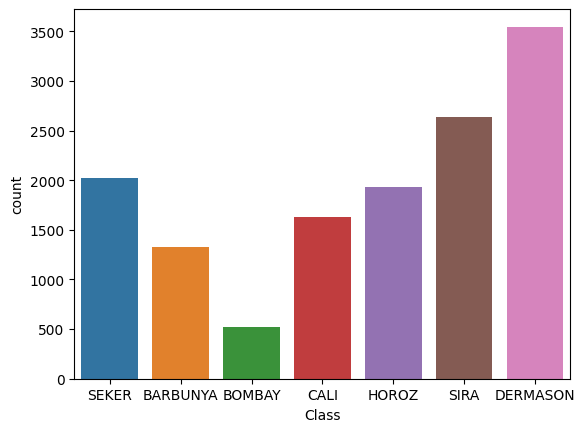

In [37]:
print(df['Class'].value_counts())
_ = sns.countplot(x='Class', data=df)

We train the data with decision tree without hyperparameter tuning or cross validation first to see how high the train and test score.

In [38]:
#train decision tree without hyperparameter tuning or cross validation
# df = shuffle(df)

X = df.drop(["Class"], axis=1)
y = df["Class"]
# print(X)
# print(y)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42, stratify=y, shuffle =True)
# k=16
# feature_selector = SelectKBest(chi2, k=k)
# X_train = feature_selector.fit_transform(X_train, y_train)
# X_test = feature_selector.transform(X_test)



# print(feature_selector.get_feature_names_out())

In [39]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

print("Score before using hyperparameter tuning and cross-validation (Decision Tree): ")
print("Train F1_Score: ", f1_score(y_train, dt.predict(X_train), average='micro'))
print("Test F1_Score: ", f1_score(y_test, dt.predict(X_test), average='micro'))

Score before using hyperparameter tuning and cross-validation (Decision Tree): 
Train F1_Score:  1.0
Test F1_Score:  0.8964377524788836


Training score is 1.0 meanwhile test score is only around 0.88 -> the model is overfitting now. We will try to use cross-validation and try to find out the best model (highest validation score) with different parameters (using hyperparameter tuning). And also show test score of the test set.

Decision Tree:

All of these paramaters (max_depth, min_samples_split, and min_samples_leaf) try to limit the size of the tree -> just try one of them and use gini/entropy index as a second parameter

In [40]:
#Decision tree with F1 score
#when tuning both parameters at same time:

# z=5 # 5 Fold cross-validation

# pipe_dt = Pipeline([
#     ("classify", tree.DecisionTreeClassifier())
# ])

# pg_dt = {
#         'classify__min_samples_leaf': [5, 15,50,100],
#         'classify__criterion': ['gini', 'entropy', 'log_loss']
#         }
# clf_dt = GridSearchCV(pipe_dt, param_grid =pg_dt,cv=z, scoring = "f1_micro", return_train_score=True)
# clf_dt.fit(X_train,y_train)

# print("Best validation score: ") 
# val_score_dt = clf_dt.best_score_
# print(clf_dt.best_score_) #Score: F1 

# print("Best parameters found: ")
# print(clf_dt.best_params_)

In [41]:
# test_score_dt =  f1_score(y_test, clf_dt.predict(X_test), average='micro')

# print("Test F1_Score: ", test_score_dt)

In [42]:
#parameters dependency impacts validation score

# cv_results_dt = pd.DataFrame(clf_dt.cv_results_)
# pivot = cv_results_dt.pivot(index='param_classify__criterion', columns='param_classify__min_samples_leaf', values='mean_test_score')
# ax = sns.heatmap(pivot, annot=True)
# ax.set_title("Dependency of parameters impacts validation score")
# plt.show()

In [43]:
###############try do parameter independently:
z = 5
pipe_dt = Pipeline([
    ("classify", tree.DecisionTreeClassifier())
])

pg_dt = {
    # 'classify__max_depth': [6,7,8,9]
        # 'classify__min_samples_split': [45,50,55]
        'classify__min_samples_leaf': [14,15,16]
        # 'classify__criterion': ['gini', 'entropy', 'log_loss']
        }
clf_dt = GridSearchCV(pipe_dt, param_grid =pg_dt,cv=z, scoring = "f1_micro", return_train_score=True)
clf_dt.fit(X_train,y_train)
val_score_dt1 = clf_dt.best_score_
best_param_dt1 = clf_dt.best_params_
test_score_dt1 =  f1_score(y_test, clf_dt.predict(X_test), average='micro')
print("Best validation score: ") 
print(clf_dt.best_score_) 
print("Best parameters found: ")
print(clf_dt.best_params_)
print("first: ", clf_dt.best_estimator_.steps[0][1])
#----------------------------
pipe_dt = Pipeline([
    ("classify", clf_dt.best_estimator_.steps[0][1])
])

pg_dt = {
        # 'classify__min_samples_leaf': [5, 15,50,100]
        'classify__criterion': ['gini', 'entropy', 'log_loss']
        }
clf_dt = GridSearchCV(pipe_dt, param_grid =pg_dt,cv=z, scoring = "f1_micro", return_train_score=True)
clf_dt.fit(X_train,y_train)
val_score_dt2 = clf_dt.best_score_
best_param_dt2 = clf_dt.best_params_
test_score_dt2 =  f1_score(y_test, clf_dt.predict(X_test), average='micro')
print("Best validation score: ") 
print(clf_dt.best_score_) #Score: F1 micro

print("Best parameters found: ")
print(clf_dt.best_params_)

Best validation score: 
0.9099928588089945
Best parameters found: 
{'classify__min_samples_leaf': 15}
first:  DecisionTreeClassifier(min_samples_leaf=15)
Best validation score: 
0.9105427262983532
Best parameters found: 
{'classify__criterion': 'log_loss'}


In [44]:
clf_dt.best_estimator_.steps[0][1].tree_.max_depth

15

Text(0.5, 1.0, 'Confusion Matrix')

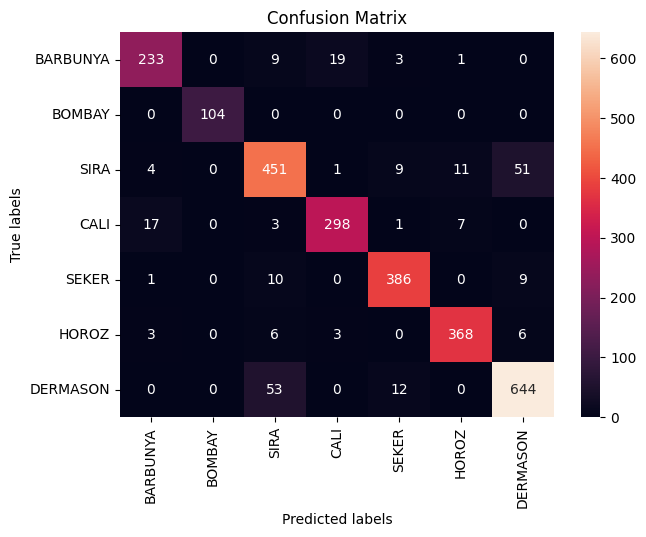

In [45]:
#Decision Tree dt
clf = clf_dt
# y_test = y_test_dt
# X_test = X_test_dt

y_pred = clf.predict(X_test)
labels=['BARBUNYA', 'BOMBAY', 'SIRA', 'CALI', 'SEKER', 'HOROZ', 'DERMASON']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels),
                    index = [i for i in labels],
                    columns = [i for i in labels])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df_cm, annot=True, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [46]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.90      0.89       258
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.91      0.93      0.92       321
    DERMASON       0.91      0.91      0.91       710
       HOROZ       0.95      0.95      0.95       387
       SEKER       0.95      0.94      0.94       411
        SIRA       0.86      0.85      0.85       532

    accuracy                           0.91      2723
   macro avg       0.92      0.93      0.92      2723
weighted avg       0.91      0.91      0.91      2723



With the confusion matrix above we can see that SIRA and DERMASON are the most confused with eachother. So we will use AdaBoost to put weight more on these labels to try to get them predicted correctly.

AdaBoostClassifier makes use of boosting technique to assigning higher weights to misclassified data, lower weights to correctly classified data and sampling again to train the next classifier.

In [48]:

ag_dt = AdaBoostClassifier(base_estimator= clf_dt.best_estimator_.steps[0][1])
pg_ag = {'learning_rate':[0.4,0.5,0.6]}
clf_ag = GridSearchCV(ag_dt, param_grid =pg_ag,cv=z, scoring = "f1_micro", return_train_score=True)
clf_ag.fit(X_train,y_train)
val_score_ag = clf_ag.best_score_
best_param_ag = clf_ag.best_params_
print("Best validation score: ") 
print(clf_ag.best_score_)

print("Best parameters found: ")
print(clf_ag.best_params_)

test_score_ag =  f1_score(y_test, clf_ag.predict(X_test), average='micro')
print("Test F1_Score: ",test_score_ag)

Text(0.5, 1.0, 'Confusion Matrix')

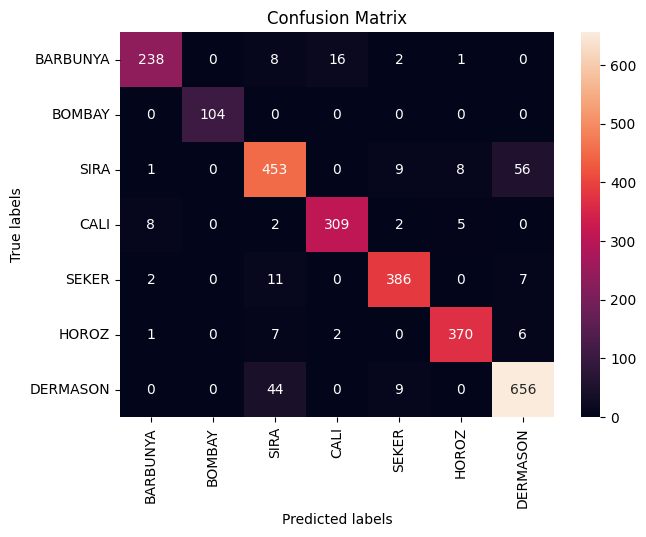

In [ ]:
#AG dt
clf = clf_ag
# y_test = y_test_dt
# X_test = X_test_dt

y_pred = clf.predict(X_test)
labels=['BARBUNYA', 'BOMBAY', 'SIRA', 'CALI', 'SEKER', 'HOROZ', 'DERMASON']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels),
                    index = [i for i in labels],
                    columns = [i for i in labels])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df_cm, annot=True, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
def plot(label, param_name, param, training_mean, training_std, test_mean, test_std):
    plt.title(label)
    plt.xlabel(param_name)
    plt.ylabel('F1-score')
    
    plt.plot(param,training_mean,'o-', color = 'r', label = 'Training_score')
    plt.plot(param,test_mean,'o-', color = 'g', label = 'Validation_score')
    plt.fill_between(param.astype('int64'), training_mean-training_std,training_mean+training_std)
    plt.fill_between(param.astype('int64'), test_mean-test_std,test_mean+test_std)
    plt.legend(loc="upper right")
    plt.show()

In [ ]:
#dependency of 1 parameter: 
clf = clf_ag
df_ag = pd.DataFrame(clf.cv_results_)
display(df_ag)
print(np.divide(df_ag["std_train_score"].to_numpy(),np.sqrt(z))) #extracting (score/ square root 5) from df
plot("n_estimators f1-score",
"param_n_estimators",
df_ag["param_learning_rate"],
df_ag["mean_train_score"],
np.divide(df_ag["std_train_score"].to_numpy(),np.sqrt(z)),
df_ag["mean_test_score"],
np.divide(df_ag["std_test_score"].to_numpy(),np.sqrt(z))
)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.693498,0.023136,0.014602,0.001200,10,{'n_estimators': 10},0.918733,0.916437,0.917815,0.919155,...,0.919177,0.002468,4,0.993571,0.996096,0.995637,0.995179,0.996441,0.995385,0.001002
1,14.380908,0.379136,0.040612,0.001351,50,{'n_estimators': 50},0.934803,0.921028,0.926997,0.925586,...,0.928362,0.005102,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,28.979154,0.681432,0.066818,0.001939,100,{'n_estimators': 100},0.933425,0.922406,0.926997,0.917777,...,0.926984,0.006339,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,127.899714,3.869834,0.344228,0.037188,500,{'n_estimators': 500},0.933884,0.924242,0.925161,0.925126,...,0.929097,0.005316,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


[0.00044811 0.         0.         0.        ]


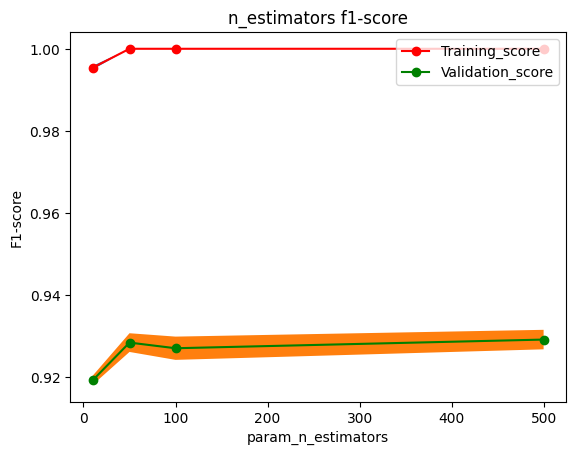

Best score: 
0.9290966203564859
Best parameters found: 
{'n_estimators': 500}


In [ ]:
#dependency of 1 parameter:
clf = clf_ag
df_ag = pd.DataFrame(clf.cv_results_)
display(df_ag)
print(np.divide(df_ag["std_train_score"].to_numpy(),np.sqrt(z))) #extracting (score/ square root 5) from df
plot("learning_rate f1-score",
"param_learning_rate",
df_ag["param_learning_rate"],
df_ag["mean_train_score"],
np.divide(df_ag["std_train_score"].to_numpy(),np.sqrt(z)),
df_ag["mean_test_score"],
np.divide(df_ag["std_test_score"].to_numpy(),np.sqrt(z))
)


The score actually gets a bit higher from ... to ... (depends each time we run this file again) eventhough there are still many missclassified beans from these 2 classes. We can see from the picture of all the bean types (we will put picture of the bean in the report), they do really look very similar.  

 Better model with with better generalization performance than DecisionTreeClassifier.

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    BARBUNYA       0.89      0.95      0.92       247
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.95      0.94      0.94       329
    DERMASON       0.94      0.92      0.93       723
       HOROZ       0.96      0.96      0.96       385
       SEKER       0.95      0.95      0.95       406
        SIRA       0.87      0.87      0.87       529

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



KNN

kNN will have trouble when the dimensionality is high and also when the features are not ideally uncorrelated. So firstly, we will show the importance of features based on the DecisionTreeClassifier model above and secondly create a heatmap to see the correlation between all features. Then we will try to choose the less important features from the correlated features to reduce them.

Area, Score: 0.00131
Perimeter, Score: 0.16006
MajorAxisLength, Score: 0.19670
MinorAxisLength, Score: 0.03176
AspectRation, Score: 0.00041
Eccentricity, Score: 0.00206
ConvexArea, Score: 0.00357
EquivDiameter, Score: 0.00774
Extent, Score: 0.00365
Solidity, Score: 0.00908
roundness, Score: 0.06820
Compactness, Score: 0.09636
ShapeFactor1, Score: 0.25005
ShapeFactor2, Score: 0.00321
ShapeFactor3, Score: 0.15204
ShapeFactor4, Score: 0.01377


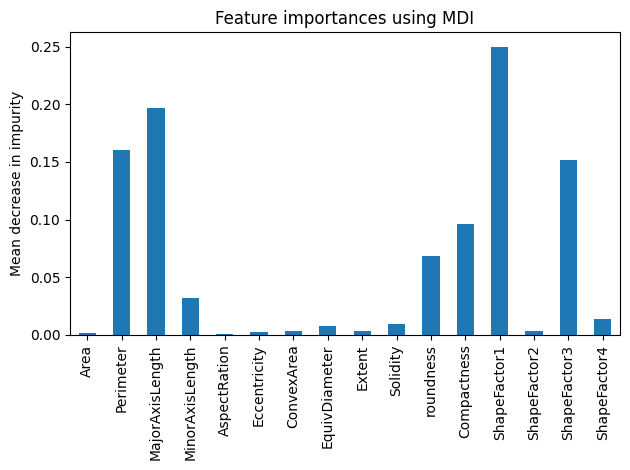

In [ ]:
deci_tree = clf_dt.best_estimator_.steps[0][1]
importance = deci_tree.feature_importances_

#print out score of each feature
for i,v in enumerate(importance):
	print('%s, Score: %.5f' % (df.drop(["Class"], axis=1).columns[i],v))

#plotting
dt_importances = pd.Series(importance, index = df.drop(["Class"], axis=1).columns)#[i for i in set(df["Class"].values)])
fig, ax = plt.subplots()
# std = np.std([tree.feature_importances_ for tree in deci_tree.estimators_], axis=0)
dt_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

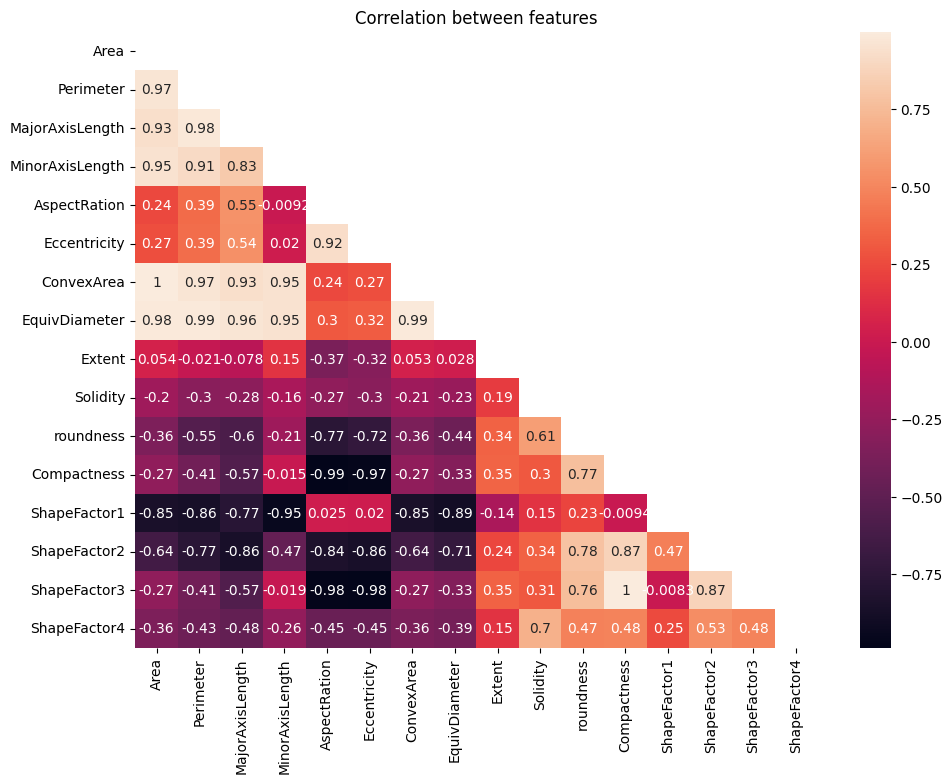

In [ ]:

correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
ax.set_title("Correlation between features")
plt.show()


These features have correlation = 1 with each other, that means we can safely drop one of them:

- ConvexArea and Area
- ShapeFactor 3 and Compactness

The features below have correlation almost equal to -1 (-0.99,-0.98) and almost to 1 (0.99, 0.98), we can also choose to drop one of them or use PCA (in future work)

- EquivDiameter and Area
- EquivDiameter and Perimeter
- MajorAxisLength and Perimeter
- AspectRation and Compactness
- AspectRation and ShapeFactor 3
- Eccentricity and ShapeFactor 3
- ConvexArea and EquivDiameter

Steps:
- For the features that have correlation = 1 we can just choose any of them to drop, so we will keep the one that is more important than the other: ConvexArea and Compactness. That means Area, EquivDiameter, ShapeFactor 3 and AspectRation will be dropped.
- Between MajorAxisLength and Perimeter we will  drop Perimeter because of lower importance.

In [ ]:

X2 = df.drop(['Area','EquivDiameter', 'ShapeFactor3', 'AspectRation', 'Perimeter', 'Class'], axis=1)
print(X2.shape)

(13611, 11)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
    ("scaler", MinMaxScaler()),
    ("classify", KNeighborsClassifier()) 
])
X_train_knn, X_test_knn, y_train_knn, y_test_knn = tts(X2, y, test_size=0.20, random_state=42, stratify=y, shuffle=True) 
pg_knn={"classify__n_neighbors":[5, 10,21, 30,50]
        }
clf_knn=GridSearchCV(pipe_knn,param_grid = pg_knn,cv=z, scoring = "f1_micro", return_train_score=True)
clf_knn.fit(X_train_knn,y_train_knn)

val_score_knn = clf_knn.best_score_
best_param_knn = clf_knn.best_params_

print("Best score: ")
print(clf_knn.best_score_)

print("Best parameters found: ")
print(clf_knn.best_params_)

Best score: 
0.9250554992443331
Best parameters found: 
{'classify__n_neighbors': 21}


In [ ]:
test_score_knn =  f1_score(y_test_knn, clf_knn.predict(X_test_knn), average='micro')
print("Test F1_Score: ", test_score_knn)

Test F1_Score:  0.9136981270657363


!!change the range of parameter to be around the best one

In [ ]:
def plot(label, param_name, param, training_mean, training_std, test_mean, test_std):
    plt.title(label)
    plt.xlabel(param_name)
    plt.ylabel('F1-score')
    
    plt.plot(param,training_mean,'o-', color = 'r', label = 'Training_score')
    plt.plot(param,test_mean,'o-', color = 'g', label = 'Validation_score')
    plt.fill_between(param.astype('int64'), training_mean-training_std,training_mean+training_std)
    plt.fill_between(param.astype('int64'), test_mean-test_std,test_mean+test_std)
    plt.legend(loc="upper left")
    plt.show()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029211,0.001720,0.087034,0.001544,5,{'classify__n_neighbors': 5},0.928834,0.918274,0.916437,0.921911,...,0.922392,0.004713,3,0.938232,0.941217,0.941217,0.944323,0.939387,0.940875,0.002065
1,0.028881,0.000447,0.097800,0.002419,10,{'classify__n_neighbors': 10},0.930211,0.912305,0.922406,0.919155,...,0.921932,0.006042,5,0.931917,0.932951,0.935821,0.933762,0.932270,0.933344,0.001390
2,0.028568,0.000508,0.112622,0.003500,21,{'classify__n_neighbors': 21},0.930211,0.921947,0.918733,0.926504,...,0.925055,0.004155,1,0.927784,0.929736,0.930425,0.928137,0.928252,0.928867,0.001026
3,0.028856,0.000769,0.125990,0.005849,30,{'classify__n_neighbors': 30},0.928834,0.917815,0.916437,0.925586,...,0.923403,0.005261,2,0.924225,0.928014,0.927440,0.925496,0.925841,0.926203,0.001368
4,0.030298,0.002469,0.141237,0.004530,50,{'classify__n_neighbors': 50},0.928375,0.914141,0.915060,0.924667,...,0.922209,0.006383,4,0.923077,0.925832,0.924225,0.922397,0.922971,0.923700,0.001220


[0.00092357 0.00062142 0.00045896 0.00061159 0.00054554]


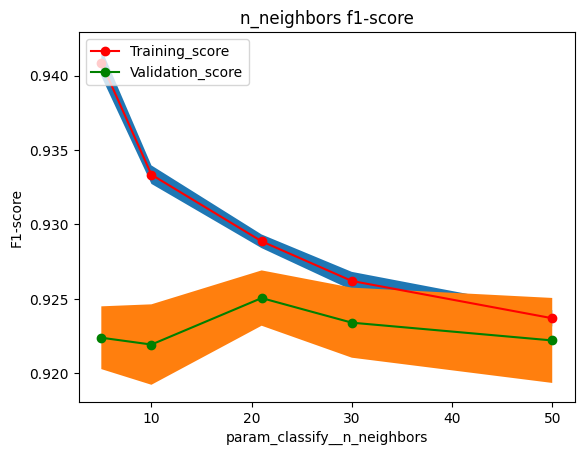

Best score: 
0.9250554992443331
Best parameters found: 
{'classify__n_neighbors': 21}


In [ ]:
#dependency of 1 parameter:
clf = clf_knn
df_knn = pd.DataFrame(clf.cv_results_)
display(df_knn)
print(np.divide(df_knn["std_train_score"].to_numpy(),np.sqrt(z))) #extracting (score/ square root 5) from df
plot("n_neighbors f1-score",
"param_classify__n_neighbors",
df_knn["param_classify__n_neighbors"],
df_knn["mean_train_score"],
np.divide(df_knn["std_train_score"].to_numpy(),np.sqrt(z)),
df_knn["mean_test_score"],
np.divide(df_knn["std_test_score"].to_numpy(),np.sqrt(z))
)

print("Best score: ")
print(clf.best_score_)

print("Best parameters found: ")
print(clf.best_params_)

In [ ]:
# #parameters dependency
# clf = clf_knn

# cv_results_knn = pd.DataFrame(clf.cv_results_)
# pivot_knn = cv_results_knn.pivot(index='param_classify__n_neighbors', columns='param_classify__weights', values='mean_test_score')
# ax_knn = sns.heatmap(pivot_knn, annot=True)
# ax.set_title("Dependency of parameters impacts validation score")
# plt.show()


Text(0.5, 1.0, 'Confusion Matrix')

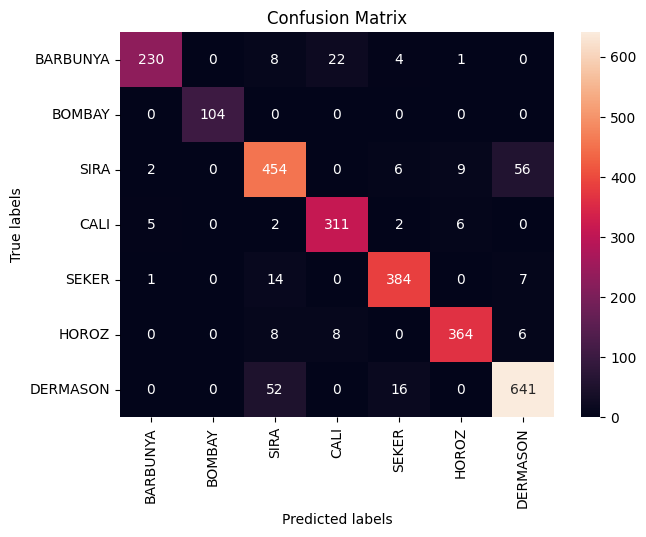

In [ ]:
#confusion matrix to see which class are most uncorrect predicted
clf = clf_knn
# y_test = y_test_knn
# X_test = X_test_knn

y_pred = clf.predict(X_test_knn)
labels=['BARBUNYA', 'BOMBAY', 'SIRA', 'CALI', 'SEKER', 'HOROZ', 'DERMASON']
df_cm = pd.DataFrame(confusion_matrix(y_test_knn, y_pred, labels=labels),
                    index = [i for i in labels],
                    columns = [i for i in labels])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df_cm, annot=True, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 

In [ ]:
print(classification_report(y_pred,y_test_knn))

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.97      0.91       238
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.95      0.91      0.93       341
    DERMASON       0.90      0.90      0.90       710
       HOROZ       0.94      0.96      0.95       380
       SEKER       0.95      0.93      0.94       412
        SIRA       0.86      0.84      0.85       538

    accuracy                           0.91      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.91      0.91      0.91      2723



SVM

In [ ]:

#SVM
from sklearn.svm import SVC

pipe_svm = Pipeline([
    ("scaler", StandardScaler()), 
    ("classify", SVC(decision_function_shape='ovo'))
])

pg_svm = {'classify__C': [1 , 10, 20],
    'classify__gamma': ['auto', 'scale']}
clf_svm = GridSearchCV(pipe_svm, param_grid =pg_svm,cv=5, scoring = "f1_micro", return_train_score=True)
# clf_svm = GridSearchCV(pipe_svm, param_grid =pg_svm,cv=z, return_train_score=True)
clf_svm.fit(X_train,y_train)

val_score_svm = clf_svm.best_score_
best_param_svm = clf_svm.best_params_

print("Best score: ") 
print(clf_svm.best_score_) #Score: F1 

print("Best parameters found: ")
print(clf_svm.best_params_)


Best score: 
0.9332294001104291
Best parameters found: 
{'classify__C': 10, 'classify__gamma': 'auto'}


In [ ]:
test_score_svm =  f1_score(y_test, clf_svm.predict(X_test), average='micro')

print("Test F1_Score: ", test_score_svm)

Test F1_Score:  0.9243481454278369


Text(0.5, 1.0, 'Confusion Matrix')

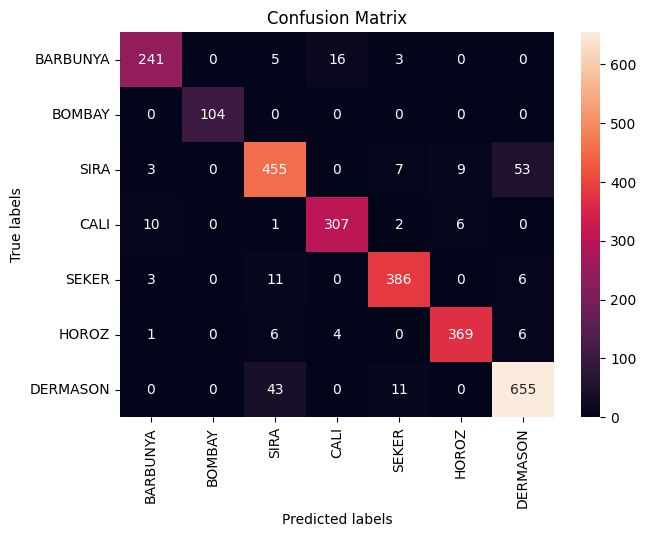

In [ ]:
#SVM confusion matrix
clf = clf_svm
# y_test = y_test_svm
# X_test = X_test_svm

y_pred = clf.predict(X_test)
labels=['BARBUNYA', 'BOMBAY', 'SIRA', 'CALI', 'SEKER', 'HOROZ', 'DERMASON']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels),
                    index = [i for i in labels],
                    columns = [i for i in labels])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df_cm, annot=True, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 

c:\Users\nguye\anaconda3\envs\ml\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Text(0.5, 1.0, 'Dependency of parameters impacts validation score')

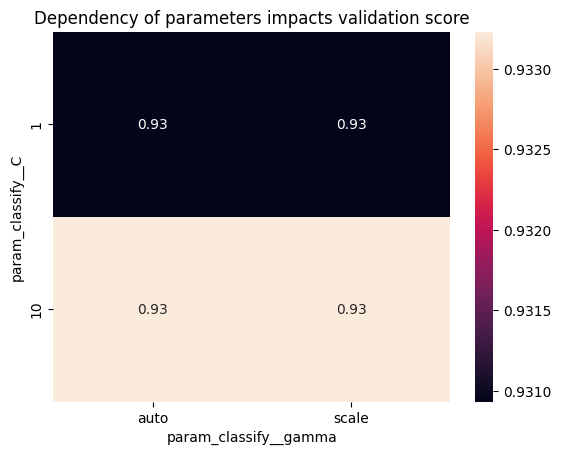

In [ ]:
#parameters dependency
cv_results_svm = pd.DataFrame(clf_svm.cv_results_)
# display(cv_results_dt)
pivot_svm = cv_results_svm.pivot(index='param_classify__C', columns='param_classify__gamma', values='mean_test_score')
ax = sns.heatmap(pivot_svm, annot=True)
ax.set_title("Dependency of parameters impacts validation score")
# plt.show()

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.93      0.92       258
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       327
    DERMASON       0.92      0.91      0.92       720
       HOROZ       0.96      0.96      0.96       384
       SEKER       0.95      0.94      0.95       409
        SIRA       0.86      0.87      0.87       521

    accuracy                           0.92      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.92      0.92      0.92      2723



In [ ]:
test_scores = [["DecisionTree min_samples_split", test_score_dt1, val_score_dt1, best_param_dt1], ["DecisionTree with both params", test_score_dt2, val_score_dt2, best_param_dt2],["AdaBoost", test_score_ag, val_score_ag, best_param_ag],["kNN", test_score_knn, val_score_knn, best_param_knn], ["SVC", test_score_svm,val_score_svm, best_param_svm]]
test_scores_df = pd.DataFrame(test_scores, columns = ['Model', 'Test Score', 'Val Score', 'Best Params'])
display(test_scores_df)

,Model,Test Score
0,DecisionTree,0.903783
1,AdaBoost_DT,0.928755
2,kNN,0.915902
3,SVC,0.924348
